In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
# 필요한 라이브러리 불러오기
import numpy   as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# 일부 이상치를 넣어서 급여 데이터를 만들어보겠습니다.
df = pd.DataFrame({'salary':[4,1,4,5,3,6,2,5,6,2,5,7,1,8,12,33,4,7,6,7,8,55]})

#모델 설정
model = IsolationForest(n_estimators=100, 
                      max_samples='auto', 
                      contamination=float(0.1),
                      max_features=1.0,
                       random_state = 1004)
# 모델 훈련
model.fit(df[['salary']])

# decision_function을 통해 이상 점수를 얻을 수 있습니다
df['scores']  = model.decision_function(df[['salary']])

# predict() 함수를 사용하면 모델의 이상 여부 판단을 얻을 수 있습니다. -1은 이상치를 나타내고, 1은 정상을 나타냅니다.
df['anomaly'] = model.predict(df[['salary']])
print(df)

    salary    scores  anomaly
0        4  0.194431        1
1        1  0.097424        1
2        4  0.194431        1
3        5  0.226778        1
4        3  0.141024        1
5        6  0.222908        1
6        2  0.151436        1
7        5  0.226778        1
8        6  0.222908        1
9        2  0.151436        1
10       5  0.226778        1
11       7  0.206867        1
12       1  0.097424        1
13       8  0.179884        1
14      12 -0.010825       -1
15      33 -0.117029       -1
16       4  0.194431        1
17       7  0.206867        1
18       6  0.222908        1
19       7  0.206867        1
20       8  0.179884        1
21      55 -0.191967       -1


In [4]:
import plotly.express as px 
from sklearn.datasets import load_iris 
from sklearn.ensemble import IsolationForest

data = load_iris(as_frame=True) 
X,y = data.data,data.target 
df = data.frame 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
iforest = IsolationForest(n_estimators=100, max_samples='auto',  
                          contamination=0.05, max_features=4,  
                          bootstrap=False, n_jobs=-1, random_state=1004)


In [6]:
#  fit_predict 함수는 훈련과 예측을 함께 수행하여 모델이 이상 여부를 판단할 수 있으며, -1은 이상을, 1은 정상을 나타냅니다.
df['label'] = iforest.fit_predict(X) 

# decision_function을 통해 이상 점수를 얻을 수 있습니다
df['scores'] = iforest.decision_function(X) 

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label,scores
0,5.1,3.5,1.4,0.2,0,1,0.175259
1,4.9,3.0,1.4,0.2,0,1,0.148031
2,4.7,3.2,1.3,0.2,0,1,0.142899
3,4.6,3.1,1.5,0.2,0,1,0.138505
4,5.0,3.6,1.4,0.2,0,1,0.167855
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1,0.113694
146,6.3,2.5,5.0,1.9,2,1,0.119680
147,6.5,3.0,5.2,2.0,2,1,0.155194
148,6.2,3.4,5.4,2.3,2,1,0.055730


In [8]:
df[df.label==-1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label,scores
13,4.3,3.0,1.1,0.1,0,-1,-0.031985
14,5.8,4.0,1.2,0.2,0,-1,-0.007388
15,5.7,4.4,1.5,0.4,0,-1,-0.063332
41,4.5,2.3,1.3,0.3,0,-1,-0.023492
109,7.2,3.6,6.1,2.5,2,-1,-0.051001
117,7.7,3.8,6.7,2.2,2,-1,-0.050850
118,7.7,2.6,6.9,2.3,2,-1,-0.074022
131,7.9,3.8,6.4,2.0,2,-1,-0.063697


In [9]:
df['anomaly'] = df['label'].apply(lambda x: 'outlier' if x==-1  else 'inlier') 
fig = px.histogram(df,x='scores',color='anomaly') 
fig.show()

In [10]:
fig = px.scatter_3d(df,x='petal width (cm)', 
                       y='sepal length (cm)', 
                       z='sepal width (cm)', 
                       color='anomaly') 
fig.show()

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">📊 Isolation Forest 기반의 신용카드 사기 탐지 모델 개발</p>

In [11]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [12]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

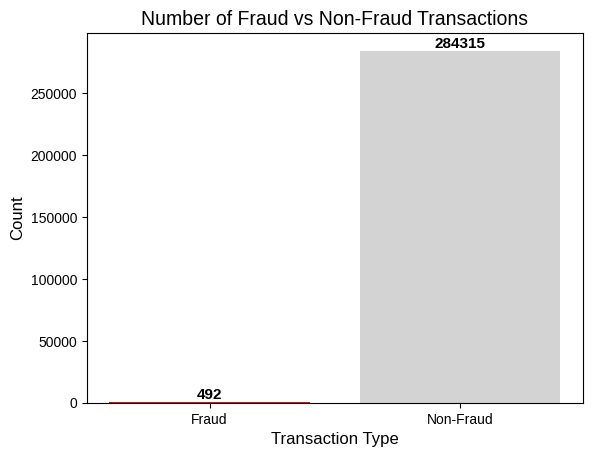

In [13]:
num_nonfraud = np.sum(data['Class'] == 0)
num_fraud = np.sum(data['Class'] == 1)

plt.bar(['Fraud', 'Non-Fraud'], [num_fraud, num_nonfraud], color=['red', 'lightgrey'])
plt.title('Number of Fraud vs Non-Fraud Transactions', fontsize=14)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# 막대 그래프 위에 수치 표시
for i, value in enumerate([num_fraud, num_nonfraud]):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=11, fontweight='bold')

# 그래프 배경 스타일 설정
plt.style.use('seaborn-whitegrid')

plt.show()


In [14]:
data['Hour'] = data["Time"].apply(lambda x : divmod(x, 3600)[0])
X = data.drop(['Time','Class'],axis=1)
Y = data.Class

In [15]:
# 모델 훈련
iforest = IsolationForest()
# fit_predict 함수로 훈련 및 예측을 동시에 수행하여 모델에서의 이상치 여부를 판단합니다. -1은 이상치, 1은 정상을 의미합니다.
data['label'] = iforest.fit_predict(X)
# decision_function을 사용하여 예측을 통해 이상치 점수를 얻을 수 있습니다.
data['scores'] = iforest.decision_function(X)
# TopN 정확도 평가
n = 1000
df = data.sort_values(by='scores', ascending=True)
df = df.head(n)
rate = df[df['Class'] == 1].shape[0] / n
print('Top{}의 정확도는: {}'.format(n, rate))

Top1000의 정확도는: 0.137


In [16]:
iforest.get_params()

{'bootstrap': False,
 'contamination': 'auto',
 'max_features': 1.0,
 'max_samples': 'auto',
 'n_estimators': 100,
 'n_jobs': None,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Top1000의 정확도: 0.114
Top1000의 정확도: 0.179
Top1000의 정확도: 0.18
Top1000의 정확도: 0.184
Top1000의 정확도: 0.178
Top1000의 정확도: 0.189
Top1000의 정확도: 0.194
Top1000의 정확도: 0.197
Top1000의 정확도: 0.185
Top1000의 정확도: 0.192
Top1000의 정확도: 0.189
Top1000의 정확도: 0.19
Top1000의 정확도: 0.193
Top1000의 정확도: 0.208
Top1000의 정확도: 0.207
Top1000의 정확도: 0.192
Top1000의 정확도: 0.197
Top1000의 정확도: 0.195
Top1000의 정확도: 0.197
Top1000의 정확도: 0.196
Top1000의 정확도: 0.202
Top1000의 정확도: 0.207
Top1000의 정확도: 0.207
Top1000의 정확도: 0.197
Top1000의 정확도: 0.195
Top1000의 정확도: 0.196
Top1000의 정확도: 0.192
Top1000의 정확도: 0.195
Top1000의 정확도: 0.191
Top1000의 정확도: 0.191
Top1000의 정확도: 0.191
Top1000의 정확도: 0.188
Top1000의 정확도: 0.183
Top1000의 정확도: 0.182
Top1000의 정확도: 0.183
Top1000의 정확도: 0.184
Top1000의 정확도: 0.185
Top1000의 정확도: 0.184
Top1000의 정확도: 0.184
Top1000의 정확도: 0.184
Top1000의 정확도: 0.183
Top1000의 정확도: 0.184
Top1000의 정확도: 0.183
Top1000의 정확도: 0.184
Top1000의 정확도: 0.183
Top1000의 정확도: 0.186
Top1000의 정확도: 0.185
Top1000의 정확도: 0.184
Top1000의 정확도: 0.185


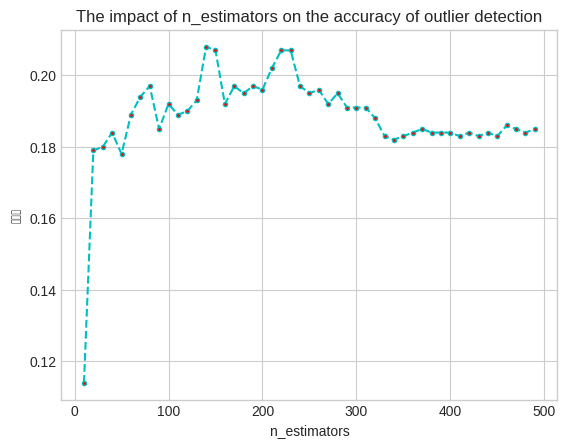

In [17]:
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')  # 경고 메시지 무시

n_est = list(range(10, 500, 10))
rates = []

for i in n_est:
    # 모델 훈련
    iforest = IsolationForest(n_estimators=i, 
                              max_samples=256,  
                              contamination=0.02, 
                              max_features=5,  
                              random_state=1
                              )
    # fit_predict 함수로 모델 훈련 및 예측
    data['label'] = iforest.fit_predict(X) 
    # decision_function으로 이상치 점수 예측
    data['scores'] = iforest.decision_function(X)  
    # TopN 정확도 평가
    n = 1000
    df = data.sort_values(by='scores', ascending=True)
    df = df.head(n)
    rate = df[df['Class']==1].shape[0] / n
    print('Top{}의 정확도: {}'.format(n, rate))
    rates.append(rate)

# 그래프 그리기
plt.style.use('seaborn-whitegrid')
plt.plot(n_est, rates, linestyle='--', marker='.', color='c', markerfacecolor='red')
plt.xlabel('n_estimators')
plt.ylabel('정확도')
plt.title('The impact of n_estimators on the accuracy of outlier detection')

# 그래프 표시
plt.show()


Top1000의 정확도는: 0.198
Top1000의 정확도는: 0.195
Top1000의 정확도는: 0.188
Top1000의 정확도는: 0.191
Top1000의 정확도는: 0.192
Top1000의 정확도는: 0.185
Top1000의 정확도는: 0.184
Top1000의 정확도는: 0.161
Top1000의 정확도는: 0.158
Top1000의 정확도는: 0.166
Top1000의 정확도는: 0.209
Top1000의 정확도는: 0.183
Top1000의 정확도는: 0.174
Top1000의 정확도는: 0.169
Top1000의 정확도는: 0.164
Top1000의 정확도는: 0.154
Top1000의 정확도는: 0.167
Top1000의 정확도는: 0.17
Top1000의 정확도는: 0.183
Top1000의 정확도는: 0.149
Top1000의 정확도는: 0.186
Top1000의 정확도는: 0.18
Top1000의 정확도는: 0.183
Top1000의 정확도는: 0.195
Top1000의 정확도는: 0.187
Top1000의 정확도는: 0.157
Top1000의 정확도는: 0.191
Top1000의 정확도는: 0.189
Top1000의 정확도는: 0.146
Top1000의 정확도는: 0.23
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[0.198, 0.195, 0.188, 0.191, 0.192, 0.185, 0.184, 0.161, 0.158, 0.166, 0.209, 0.183, 0.174, 0.169, 0.164, 0.154, 0.167, 0.17, 0.183, 0.149, 0.186, 0.18, 0.183, 0.195, 0.187, 0.157, 0.191, 0.189, 0.146, 0.23]


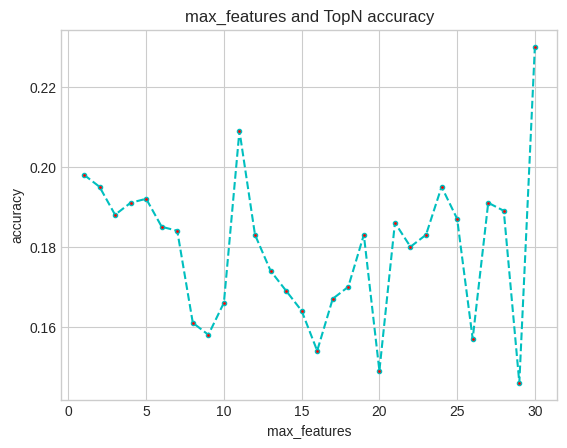

In [18]:
features = list(range(1, X.shape[1]+1))
rates = []
for i in features:
    # 모델 훈련
    iforest = IsolationForest(n_estimators=100,
                              max_samples=256,
                              contamination=0.02,
                              max_features=i,
                              random_state=1
                              )
    # fit_predict 함수로 훈련 및 예측을 동시에 수행하여 모델에서의 이상치 여부를 판단합니다. -1은 이상치, 1은 정상을 의미합니다.
    data['label'] = iforest.fit_predict(X)
    # decision_function을 사용하여 예측을 통해 이상치 점수를 얻을 수 있습니다.
    data['scores'] = iforest.decision_function(X)
    # Top-N 정확도 평가
    n = 1000
    df = data.sort_values(by='scores', ascending=True)
    df = df.head(n)
    rate = df[df['Class'] == 1].shape[0] / n
    print('Top{}의 정확도는: {}'.format(n, rate))
    rates.append(rate)

print(features)
print(rates)

import matplotlib.pyplot as plt
plt.plot(features, rates, linestyle='--', marker='.', color='c', markerfacecolor='red')
plt.title('max_features and TopN accuracy')
plt.xlabel('max_features')
plt.ylabel('accuracy')
plt.show()


Top1000의 정확도는: 0.195
Top1000의 정확도는: 0.197
Top1000의 정확도는: 0.204
Top1000의 정확도는: 0.183
Top1000의 정확도는: 0.208
Top1000의 정확도는: 0.191
Top1000의 정확도는: 0.221
Top1000의 정확도는: 0.195
Top1000의 정확도는: 0.167
Top1000의 정확도는: 0.204
Top1000의 정확도는: 0.197
Top1000의 정확도는: 0.171
Top1000의 정확도는: 0.182
Top1000의 정확도는: 0.205
Top1000의 정확도는: 0.193
Top1000의 정확도는: 0.173
Top1000의 정확도는: 0.206
Top1000의 정확도는: 0.194
Top1000의 정확도는: 0.224
Top1000의 정확도는: 0.188
Top1000의 정확도는: 0.215
Top1000의 정확도는: 0.189
Top1000의 정확도는: 0.218
Top1000의 정확도는: 0.178
Top1000의 정확도는: 0.209
Top1000의 정확도는: 0.181
Top1000의 정확도는: 0.212
Top1000의 정확도는: 0.18
Top1000의 정확도는: 0.178
Top1000의 정확도는: 0.22
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[0.195, 0.197, 0.204, 0.183, 0.208, 0.191, 0.221, 0.195, 0.167, 0.204, 0.197, 0.171, 0.182, 0.205, 0.193, 0.173, 0.206, 0.194, 0.224, 0.188, 0.215, 0.189, 0.218, 0.178, 0.209, 0.181, 0.212, 0.18, 0.178, 0.22]


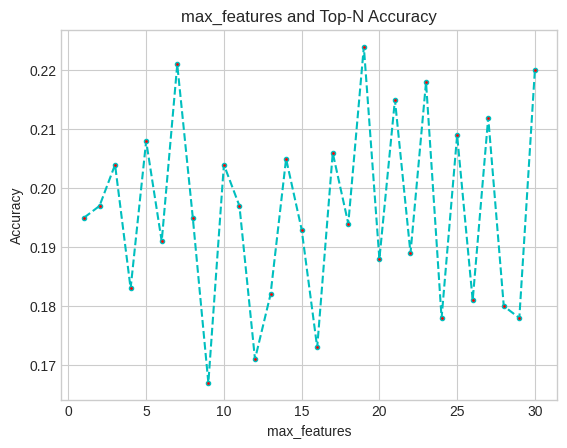

In [19]:
features = list(range(1, X.shape[1]+1))
rates = []

for i in features:
    # 모델 훈련
    iforest = IsolationForest(n_estimators=100,
                              max_samples=1200,
                              contamination=0.02,
                              max_features=i,
                              random_state=1
                              )
    # fit_predict 함수로 훈련 및 예측을 동시에 수행하여 모델에서의 이상치 여부를 판단합니다. -1은 이상치, 1은 정상을 의미합니다.
    data['label'] = iforest.fit_predict(X)
    # decision_function을 사용하여 예측을 통해 이상치 점수를 얻을 수 있습니다.
    data['scores'] = iforest.decision_function(X)
    # Top-N 정확도 평가
    n = 1000
    df = data.sort_values(by='scores', ascending=True)
    df = df.head(n)
    rate = df[df['Class'] == 1].shape[0] / n
    print('Top{}의 정확도는: {}'.format(n, rate))
    rates.append(rate)

print(features)
# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

print(rates)
# [0.198, 0.195, 0.188, 0.191, 0.192, 0.185, 0.184, 0.161, 0.158, 0.166, 0.209, 0.183, 0.174, 0.169, 0.164, 0.154, 0.167, 0.17, 0.183, 0.149, 0.186, 0.18, 0.183, 0.195, 0.187, 0.157, 0.191, 0.189, 0.146, 0.23]

import matplotlib.pyplot as plt
plt.plot(features, rates, linestyle='--', marker='.', color='c', markerfacecolor='red')
plt.title('max_features and Top-N Accuracy')
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.show()


Top1000의 정확도는:0.142
Top1000의 정확도는:0.115
Top1000의 정확도는:0.1
Top1000의 정확도는:0.127
Top1000의 정확도는:0.131
Top1000의 정확도는:0.164
Top1000의 정확도는:0.174
Top1000의 정확도는:0.18
Top1000의 정확도는:0.167
Top1000의 정확도는:0.169
Top1000의 정확도는:0.169
Top1000의 정확도는:0.171
Top1000의 정확도는:0.168
Top1000의 정확도는:0.179
Top1000의 정확도는:0.189
Top1000의 정확도는:0.192
Top1000의 정확도는:0.173
Top1000의 정확도는:0.177
Top1000의 정확도는:0.172
Top1000의 정확도는:0.167
Top1000의 정확도는:0.171
Top1000의 정확도는:0.17
Top1000의 정확도는:0.173
Top1000의 정확도는:0.185
Top1000의 정확도는:0.172
Top1000의 정확도는:0.174
Top1000의 정확도는:0.179
Top1000의 정확도는:0.165
Top1000의 정확도는:0.166
Top1000의 정확도는:0.183
Top1000의 정확도는:0.183
Top1000의 정확도는:0.165
Top1000의 정확도는:0.199
Top1000의 정확도는:0.201
Top1000의 정확도는:0.196
Top1000의 정확도는:0.191
Top1000의 정확도는:0.197
Top1000의 정확도는:0.19
Top1000의 정확도는:0.194
Top1000의 정확도는:0.198
Top1000의 정확도는:0.186
Top1000의 정확도는:0.187
Top1000의 정확도는:0.188
Top1000의 정확도는:0.186
Top1000의 정확도는:0.194
Top1000의 정확도는:0.185
Top1000의 정확도는:0.18
Top1000의 정확도는:0.187
Top1000의 정확도는:0.189
Top1000의 정확도는:0.202
Top100

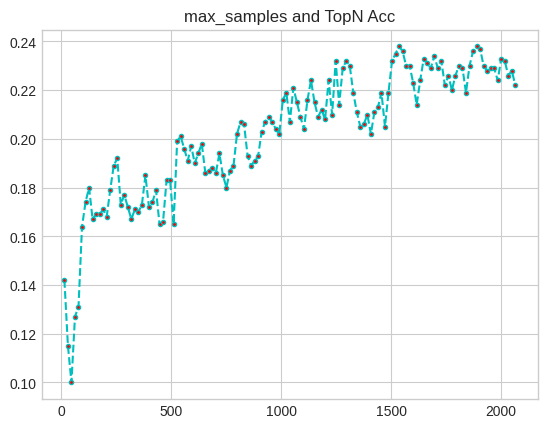

In [20]:
samples = list(range(16,2066,16))
rates = []
for i in samples:
    # 모델 훈련
    iforest = IsolationForest(n_estimators=100, 
                              max_samples= i,  
                              contamination=0.02, 
                              max_features=5,  
                              random_state=1
                              )
    # fit_predict 함수를 이용해 훈련과 예측을 함께 수행하며, -1은 이상치, 1은 정상치를 나타냄
    data['label'] = iforest.fit_predict(X) 
    # decision_function을 이용해 이상치 점수를 예측
    data['scores'] = iforest.decision_function(X)  
    # TopN 정확도 평가
    n = 1000
    df =  data.sort_values(by='scores',ascending=True)
    df = df.head(n)
    rate = df[df['Class']==1].shape[0]/n
    print('Top{}의 정확도는:{}'.format(n,rate))
    rates.append(rate)
    
import matplotlib.pyplot as plt
plt.plot(samples,rates, linestyle='--', marker='.',color='c',markerfacecolor='red')
plt.title('max_samples and TopN Acc')
plt.show()


Top1000의 정확도:0.105
Top1000의 정확도:0.234
Top1000의 정확도:0.227
Top1000의 정확도:0.231
Top1000의 정확도:0.238
Top1000의 정확도:0.206
Top1000의 정확도:0.231
Top1000의 정확도:0.218
Top1000의 정확도:0.247
Top1000의 정확도:0.228
Top1000의 정확도:0.242
Top1000의 정확도:0.248
Top1000의 정확도:0.228
Top1000의 정확도:0.234
Top1000의 정확도:0.245
Top1000의 정확도:0.241
Top1000의 정확도:0.248
Top1000의 정확도:0.221
Top1000의 정확도:0.248
Top1000의 정확도:0.249
Top1000의 정확도:0.242
Top1000의 정확도:0.243
Top1000의 정확도:0.225
Top1000의 정확도:0.228
Top1000의 정확도:0.23
Top1000의 정확도:0.233
Top1000의 정확도:0.235
Top1000의 정확도:0.248
Top1000의 정확도:0.243
Top1000의 정확도:0.247
Top1000의 정확도:0.254
Top1000의 정확도:0.251
Top1000의 정확도:0.252
Top1000의 정확도:0.236
Top1000의 정확도:0.246
Top1000의 정확도:0.233
Top1000의 정확도:0.235
Top1000의 정확도:0.223
Top1000의 정확도:0.246
Top1000의 정확도:0.244
Top1000의 정확도:0.255
Top1000의 정확도:0.251
Top1000의 정확도:0.249
Top1000의 정확도:0.254
Top1000의 정확도:0.251
Top1000의 정확도:0.257
Top1000의 정확도:0.242
Top1000의 정확도:0.261
Top1000의 정확도:0.235
Top1000의 정확도:0.243
Top1000의 정확도:0.246
Top1000의 정확도:0.246
Top1000의 정확도:

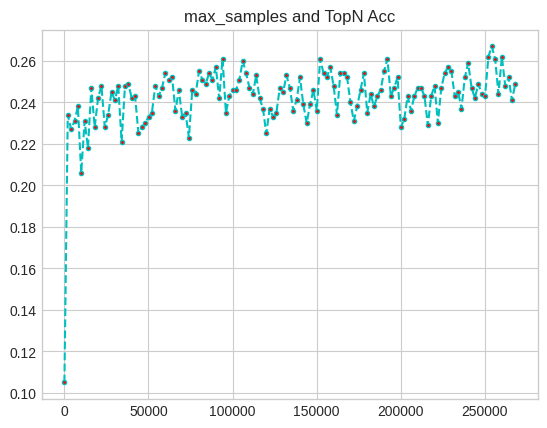

In [21]:
# 샘플 크기 범위를 정의합니다.
samples = list(range(50,270000,2000))
# 정확도를 저장할 빈 리스트를 생성합니다.
rates = []

# 각 샘플 크기에 대해 반복합니다.
for i in samples:
    # 모델을 학습시킵니다.
    iforest = IsolationForest(n_estimators=100, 
                              max_samples = i,  
                              contamination=0.02, 
                              max_features=5,  
                              random_state=1
                              )
    # fit_predict 함수를 사용하여 데이터를 학습하고 예측합니다. 이상치는 -1, 정상은 1로 표시됩니다.
    data['label'] = iforest.fit_predict(X) 
    # decision_function을 사용하여 이상치 점수를 계산합니다.
    data['scores'] = iforest.decision_function(X)  
    # TopN 정확도를 평가합니다.
    n = 1000
    # 점수가 낮은 순서대로 데이터를 정렬합니다.
    df =  data.sort_values(by='scores',ascending=True)
    # Top N 데이터를 선택합니다.
    df = df.head(n)
    # 선택된 데이터 중 이상치의 비율을 계산합니다.
    rate = df[df['Class']==1].shape[0]/n
    print('Top{}의 정확도:{}'.format(n,rate))
    # 정확도를 rates 리스트에 추가합니다.
    rates.append(rate)
    
# 결과를 그래프로 시각화합니다.
import matplotlib.pyplot as plt
plt.plot(samples,rates, linestyle='--', marker='.',color='c',markerfacecolor='red')
plt.title('max_samples and TopN Acc')
plt.show()


In [22]:
# 모델 훈련
iforest = IsolationForest(n_estimators=250, 
                          max_samples = 125000,  
                          contamination=0.05, 
                          max_features=5,  
                          random_state=1
                          )
# fit_predict 함수를 이용해 훈련과 예측을 함께 수행하며, -1은 이상치, 1은 정상치를 나타냄
data['label'] = iforest.fit_predict(X) 
# decision_function을 이용해 이상치 점수를 예측
data['scores'] = iforest.decision_function(X)  
# TopN 정확도 평가
n = 1000
df =  data.sort_values(by='scores',ascending=True)
df = df.head(n)
rate = df[df['Class']==1].shape[0]/n
print('Top{}의 정확도는:{}'.format(n,rate))
# 출력 결과: Top1000의 정확도는:0.251

# Top1000 데이터 저장
# df.to_csv('df.csv',header=True,index=False)


Top1000의 정확도는:0.251
